In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

In [53]:
df["Pincode"] = df["Pincode"].apply(lambda x : int(x))

In [54]:
df.dtypes

Unnamed: 0            int64
Unnamed: 0.1          int64
Unnamed: 0.1.1        int64
Name                 object
Phone Number         object
Address              object
Pincode               int64
Website              object
Social Media Link    object
dtype: object

In [78]:
df = df.drop(df.columns[0:3],axis = 1)

In [142]:
df

,Name,Phone Number,Address,Pincode,Website,Social Media Link
0,RC Kataria Nursery,+91 9891908221,"House No. 1, Mathura Road, Nizamuddin, Delhi -...",110013,https://r-c-kataria-nursery.business.site,https://www.instagram.com/rckatarianursery/
1,City Nursery,+91 9891114999,"Plot No. 48, Greater Kailash, Delhi - 110048",110048,NaN,NaN
2,Rajesh Nursery,+91 9213672295,"Plot No. F/3, Gali No 1, Badkhal Road, Memoria...",121009,NaN,NaN
3,New Delhi Nursery,+91 9210774696,"Rajokri, Jamia Nagar, Delhi - 110044",110044,NaN,NaN
4,Eco Planners Pvt. Ltd.,45553919,"Office No. C-2, Tikona Park Gulmohar Avenue, J...",110025,NaN,NaN
5,Gulmohar Farm & Nursery,+91 9891484872,"Office No. C-2, Tikona Park Gulmohar Avenue, J...",110025,NaN,NaN
6,Green valley india,+91 9868431800,"No. B-1/221, Main Road, Janakpuri, Delhi - 110058",110058,http://www.greenvalleylimited.com,NaN
7,HP Greens,+91 9810943383,"No. B-1/221, Main Road, Janakpuri, Delhi - 110058",110058,NaN,NaN
8,Deepak Nursery,+91 7838308762,",Main Street, Kavi Nagar, Nasirpur, Delhi - 11...",110048,NaN,https://www.instagram.com/deepaknursery/?hl=en
9,Aarzoo Decorations,+91 8700089503,"IFFCO House ,No. 34, Nehru Place, Delhi - 110019",110019,NaN,NaN


In [198]:
df.to_csv("final_df.csv")

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

df.isnull().sum()

Name                  0
Phone Number          0
Address               0
Pincode               0
Website              30
Social Media Link    29
dtype: int64

In [67]:
website_na = df["Website"].isnull().sum()

In [68]:
website_not_na = len(df) - website_na

In [123]:
website_df = pd.DataFrame([['Nurseries that have websites',website_na],['Nurseries that do not have websites',website_not_na]],columns=["Website_Config","Counts"])

In [124]:
website_df["Percentage"] = [str((website_na/len(df))*100)+"%",str((website_not_na/len(df))*100)+"%"]

/Users/sourya/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


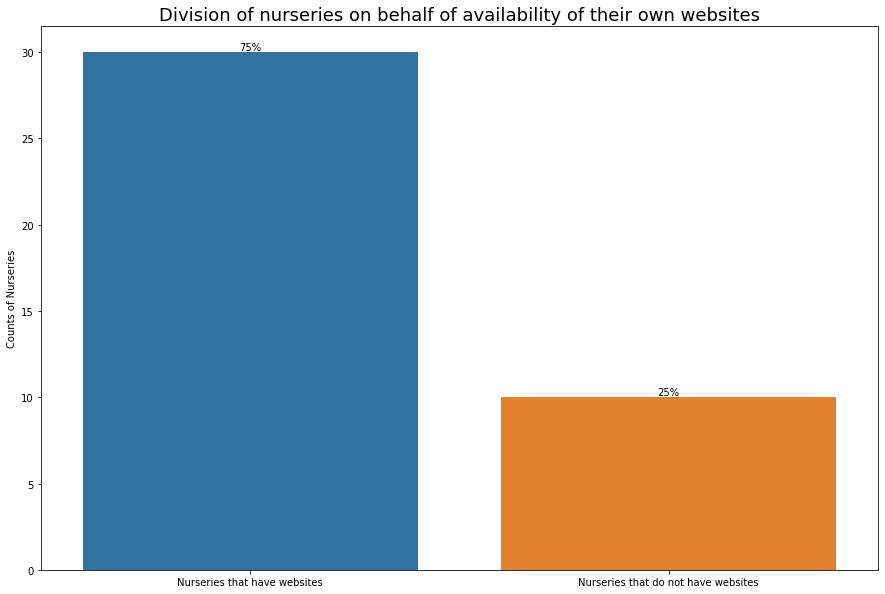

In [197]:
plt.figure(figsize=(15,10))
graph = sns.barplot(website_df.Website_Config, website_df.Counts)
plt.xlabel("")
plt.ylabel("Counts of Nurseries")
plt.title("Division of nurseries on behalf of availability of their own websites", fontdict={'fontsize': 18})
for p in graph.patches:
        graph.annotate('{:.0f}%'.format((p.get_height()/len(df))*100), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

/Users/sourya/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of nurseries in different Pincodes')

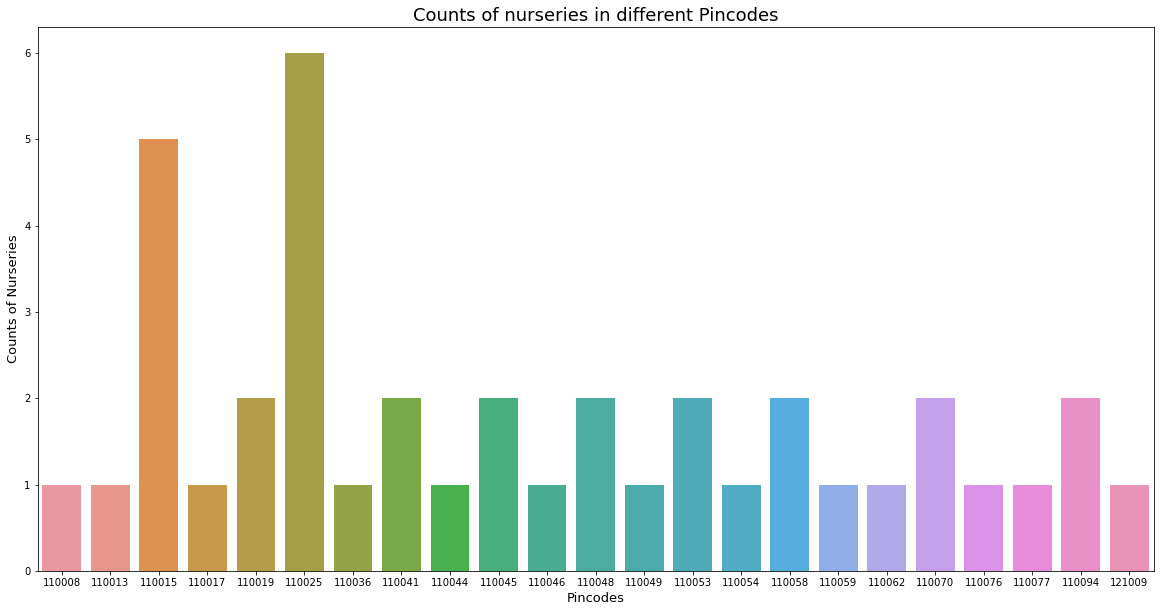

In [200]:
plt.figure(figsize=(20,10))
axes = sns.countplot(df["Pincode"])
plt.xlabel("Pincodes")
plt.ylabel("Counts of Nurseries")
axes.xaxis.label.set_size(13)
axes.yaxis.label.set_size(13)
plt.title("Counts of nurseries in different Pincodes", fontdict={'fontsize': 18})

In [164]:
social_na = df["Social Media Link"].isnull().sum()

In [165]:
social_not_na = len(df) - social_na

In [180]:
social_df = pd.DataFrame([['Nurseries that have social media handles',social_na],['Nurseries that do not have social media handles',social_not_na]],columns=["Social_Config","Counts"])

In [181]:
social_df

,Social_Config,Counts
0,Nurseries that have social media handles,29
1,Nurseries that do not have social media handles,11


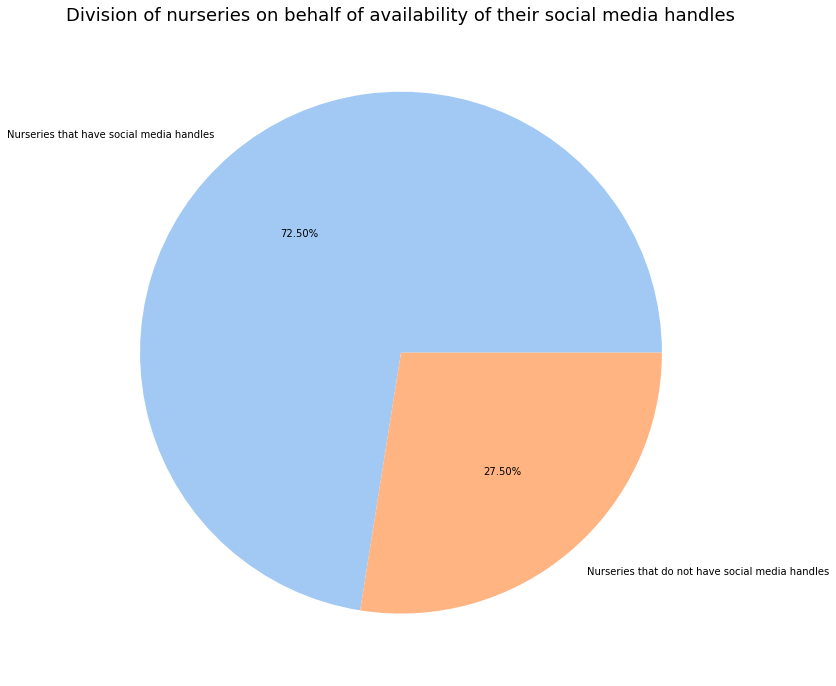

In [193]:
plt.figure(figsize=(18,12))

colors = sns.color_palette('pastel')[0:2]

axes = plt.pie(social_df.Counts, labels = social_df.Social_Config, colors = colors, autopct='%.2f%%')

plt.title("Division of nurseries on behalf of availability of their social media handles", fontdict={'fontsize': 18})

plt.show()

In [201]:
!pip install pandas-profiling

     |████████████████████████████████| 261 kB 1.8 MB/s eta 0:00:01       | 153 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 173 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 44 kB 5.3 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 126 kB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 6.2 MB/s ta 0:00:011
     |████████████████████████████████| 3.1 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 124 kB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27099 sha256=b450616eabf7e19a250c0f93797733e33fcda86cda2ca52611417e4b0523d740
 

In [2]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

     |████████████████████████████████| 121 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 12.1 MB/s eta 0:00:01
